In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build

In [53]:
# Getting the YouTube service
api_key = 'xxx'  # <-- Replace it with your api key
api_service_name = 'youtube'
api_version = 'v3'


In [51]:
youtube = build(api_service_name, api_version, developerKey = api_key)

In [3]:
# Creating a list of the YouTube channels
channels = ['UCJ7UhloHSA4wAqPzyi6TOkw',
            'UCnz-ZXXER4jOvuED5trXfEA',
            'UC7cs8q-gJRlGwj4A8OmCmXg',
            'UCCezIgC97PvUuR4_gbFUs5g',
            'UCFp1vaKzpfvoGai0vE5VJ0w'
           ]

In [20]:
# Creating a function to pull data from the channels
def getChannelData(channel_ids):
    ids = ','.join(channel_ids)  # <-- The 'id' parameter accepts a comma-separated list of the channel ids
    
    # Creating a dictionary and a list that will host the results returned by the API
    data = dict()
    all_channels = list()
    
    request = youtube.channels().list(
                part = 'snippet,contentDetails,statistics',
                id = ids)
    response = request.execute()
    
    # Specifying the actual data that will be extracted 
    for i in range(0, len(response['items'])):
        data['Channel'] = response['items'][i]['snippet']['title']
        data['Subscribers'] = response['items'][i]['statistics']['subscriberCount']
        data['Videos'] = response['items'][i]['statistics']['videoCount']
        data['Views'] = response['items'][i]['statistics']['viewCount']
        data['PlaylistIds'] = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        all_channels.append(data.copy())
    
    return all_channels

In [21]:
# Inspecting the data generated by the function above
stats_all_channels = getChannelData(channels)
stats_all_channels

[{'Channel': 'Curbal',
  'Subscribers': '97400',
  'Videos': '902',
  'Views': '12992361',
  'PlaylistIds': 'UUJ7UhloHSA4wAqPzyi6TOkw'},
 {'Channel': 'Alex The Analyst',
  'Subscribers': '242000',
  'Videos': '151',
  'Views': '9657244',
  'PlaylistIds': 'UU7cs8q-gJRlGwj4A8OmCmXg'},
 {'Channel': 'Guy in a Cube',
  'Subscribers': '271000',
  'Videos': '780',
  'Views': '20807678',
  'PlaylistIds': 'UUFp1vaKzpfvoGai0vE5VJ0w'},
 {'Channel': 'techTFQ',
  'Subscribers': '88000',
  'Videos': '64',
  'Views': '4044556',
  'PlaylistIds': 'UUnz-ZXXER4jOvuED5trXfEA'},
 {'Channel': 'Corey Schafer',
  'Subscribers': '947000',
  'Videos': '230',
  'Views': '74778331',
  'PlaylistIds': 'UUCezIgC97PvUuR4_gbFUs5g'}]

In [22]:
# Creating a dataframe based on the dictionary extracted from the API
df_stats = pd.DataFrame(stats_all_channels)
df_stats

,Channel,Subscribers,Videos,Views,PlaylistIds
0,Curbal,97400,902,12992361,UUJ7UhloHSA4wAqPzyi6TOkw
1,Alex The Analyst,242000,151,9657244,UU7cs8q-gJRlGwj4A8OmCmXg
2,Guy in a Cube,271000,780,20807678,UUFp1vaKzpfvoGai0vE5VJ0w
3,techTFQ,88000,64,4044556,UUnz-ZXXER4jOvuED5trXfEA
4,Corey Schafer,947000,230,74778331,UUCezIgC97PvUuR4_gbFUs5g


In [23]:


# Checking data types
df_stats.dtypes



Channel        object
Subscribers    object
Videos         object
Views          object
PlaylistIds    object
dtype: object

In [24]:
# Making the columns 'Views', 'Subscribers', and 'Videos' numerical (they're currently strings)
df_stats['Subscribers'] = df_stats['Subscribers'].astype(int)
df_stats['Videos'] = df_stats['Videos'].astype(int)
df_stats['Views'] = (df_stats['Views'].astype(int)) / 1000  # View numbers are usually high. Dividing it by 1000 for ease of use 
df_stats.dtypes

Channel         object
Subscribers      int64
Videos           int64
Views          float64
PlaylistIds     object
dtype: object

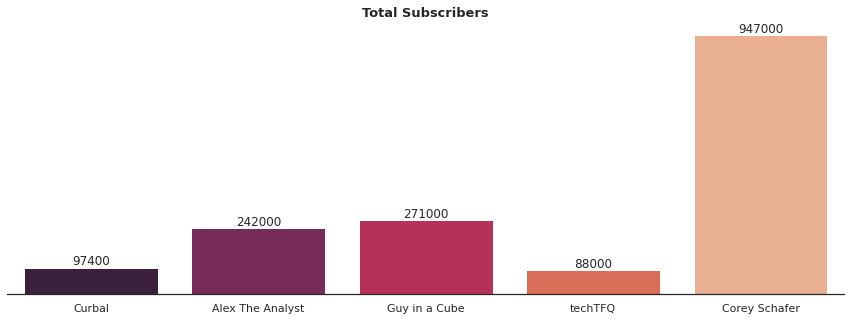

In [25]:
# Visualising the number of 'Subscribers' for all the channels
sns.set(rc = {'figure.figsize': (15, 5)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel', y = 'Subscribers', data = df_stats, palette = 'rocket')
ax.set_title('Total Subscribers', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)

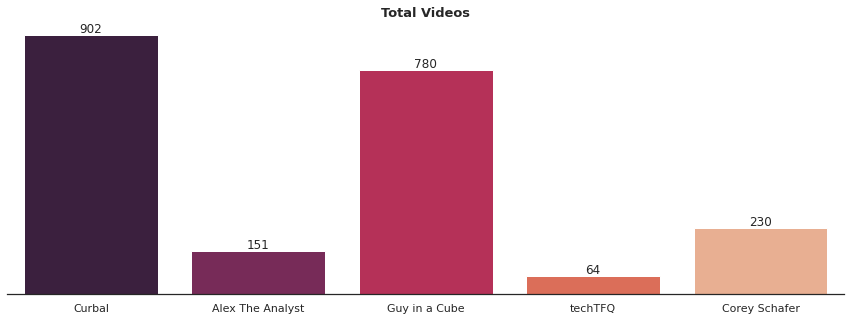

In [26]:

# Visualising the number of 'Videos' for all the channels
sns.set(rc = {'figure.figsize': (15, 5)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel', y = 'Videos', data = df_stats, palette = 'rocket')
ax.set_title('Total Videos', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)

In [27]:


# Getting the playlist ids from the dataframe used previously
playlists = df_stats['PlaylistIds']
playlists



0    UUJ7UhloHSA4wAqPzyi6TOkw
1    UU7cs8q-gJRlGwj4A8OmCmXg
2    UUFp1vaKzpfvoGai0vE5VJ0w
3    UUnz-ZXXER4jOvuED5trXfEA
4    UUCezIgC97PvUuR4_gbFUs5g
Name: PlaylistIds, dtype: object

In [28]:
# Creating a function to get the videos ids for each channel
def getVideoIds(playlist_ids):
    
    # Creating a dictionary and a list that will host the results returned by the API
    all_video_ids = list()
    
    for playlist in playlist_ids:
        # Getting data from the first page of results
        # The default number of items returned is 5 (setting it to the maximum value allowed: 50)
        request = youtube.playlistItems().list(
                    part = 'snippet,contentDetails',
                    playlistId = playlist,
                    maxResults = 50)   
        response = request.execute()

        # Specifying the actual data that will be extracted 
        for i in range(0,len(response['items'])):
            all_video_ids.append(response['items'][i]['snippet']['resourceId']['videoId'])


        # Handling pagination
        next_page_token = response.get('nextPageToken')
        next_page = True

        while next_page:
            if next_page_token == None:
                next_page = False
            else:
                request = youtube.playlistItems().list(
                    part = 'snippet,contentDetails',
                    playlistId = playlist,
                    maxResults = 50,
                    pageToken = next_page_token)  # <-- If there are more pages, the parameter 'pageToken' is required
                response = request.execute()

                for i in range(0,len(response['items'])):
                    all_video_ids.append(response['items'][i]['snippet']['resourceId']['videoId'])
            # Updating the 'next_page_token' variable as it loops through the pages
            next_page_token = response.get('nextPageToken')  
        
    return all_video_ids

In [31]:
# Saving the results returned by the function above (all video ids) in a variable
videos = getVideoIds(playlists)

In [33]:
# Creating a function to pull details from each video
def getVideoData(video_ids):
    
    # Creating a dictionary and a list that will host the results returned by the API
    data = dict()
    all_videos = list()

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                        part = 'snippet,contentDetails,statistics',
                        id = ','.join(video_ids[i:i+50]),
                        maxResults = 50)
        response = request.execute()  
        
        for video in response['items']:
            
            data['Channel_name'] = video['snippet']['channelTitle']
            data['Channel_id'] = video['snippet']['channelId']
            data['Video_title'] = video['snippet']['title']
            data['Video_id'] = video_ids[i]
            data['Video_duration'] = video['contentDetails']['duration']
            data['Video_publication'] = video['snippet']['publishedAt']
            data['Video_views'] = video['statistics']['viewCount']
            data['Video_likes'] = video['statistics'].get('likeCount')
            data['Video_comments'] = video['statistics']['commentCount']
            data['Video_tags'] = video['snippet'].get('tags')
            
            all_videos.append(data.copy())
    
    return all_videos


In [34]:


# Creating a dataframe based on the Videos details data
df_videos_stats = pd.DataFrame(getVideoData(videos))
df_videos_stats.head(3)



,Channel_name,Channel_id,Video_title,Video_id,Video_duration,Video_publication,Video_views,Video_likes,Video_comments,Video_tags
0,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Track all your social media channels EASILY in...,RepXKIEXSY4,PT7M43S,2022-07-07T12:00:30Z,1132,76,8,"[Power bi, powerbi, Curbal, power bi desktop, ..."
1,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Conditional format the Power BI line chart wit...,RepXKIEXSY4,PT4M32S,2022-07-05T12:00:27Z,2313,113,8,"[Power bi, powerbi, Curbal, power bi desktop, ..."
2,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,DAX Fridays #216: NETWORKDAYS function is fina...,RepXKIEXSY4,PT4M1S,2022-06-30T12:00:24Z,2994,177,35,"[Power bi, powerbi, Curbal, power bi desktop, ..."


In [35]:
df_videos_stats.dtypes

Channel_name         object
Channel_id           object
Video_title          object
Video_id             object
Video_duration       object
Video_publication    object
Video_views          object
Video_likes          object
Video_comments       object
Video_tags           object
dtype: object

In [36]:
# Converting video duration (currently, it is an ISO 8601 duration) to seconds
df_videos_stats['Video_duration'] = pd.to_timedelta(df_videos_stats['Video_duration']).dt.total_seconds()



# Changing the format of the 'Video_publication' from string to date
df_videos_stats['Video_publication'] = pd.to_datetime(df_videos_stats['Video_publication']).dt.date



# Converting the columns 'Video_views', 'Video_likes', and 'Video_comments' to numeric
df_videos_stats['Video_views'] = df_videos_stats['Video_views'].astype(int) / 1000
df_videos_stats['Video_likes'] = df_videos_stats['Video_likes'].astype(pd.Int64Dtype())
df_videos_stats['Video_comments'] = df_videos_stats['Video_comments'].astype(int)
df_videos_stats.head()



,Channel_name,Channel_id,Video_title,Video_id,Video_duration,Video_publication,Video_views,Video_likes,Video_comments,Video_tags
0,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Track all your social media channels EASILY in...,RepXKIEXSY4,463.0,2022-07-07,1.132,76,8,"[Power bi, powerbi, Curbal, power bi desktop, ..."
1,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Conditional format the Power BI line chart wit...,RepXKIEXSY4,272.0,2022-07-05,2.313,113,8,"[Power bi, powerbi, Curbal, power bi desktop, ..."
2,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,DAX Fridays #216: NETWORKDAYS function is fina...,RepXKIEXSY4,241.0,2022-06-30,2.994,177,35,"[Power bi, powerbi, Curbal, power bi desktop, ..."
3,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,"Append exported Power BI data to Excel, AUTOMA...",RepXKIEXSY4,305.0,2022-06-26,2.848,119,23,"[Power bi, powerbi, Curbal, power bi desktop, ..."
4,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Filter the data in Power BI before you export ...,RepXKIEXSY4,637.0,2022-06-25,1.344,59,6,"[Power bi, powerbi, Curbal, power bi desktop, ..."


In [39]:
# Creating a subset of the data, which contains the top 5 videos from each channel
top5_videos = df_videos_stats.groupby(['Channel_name']).apply(lambda x: x.sort_values(['Channel_name', 'Video_views'], ascending = False)).reset_index(drop = True)
top5_videos = top10_videos.groupby(['Channel_name']).head(5)

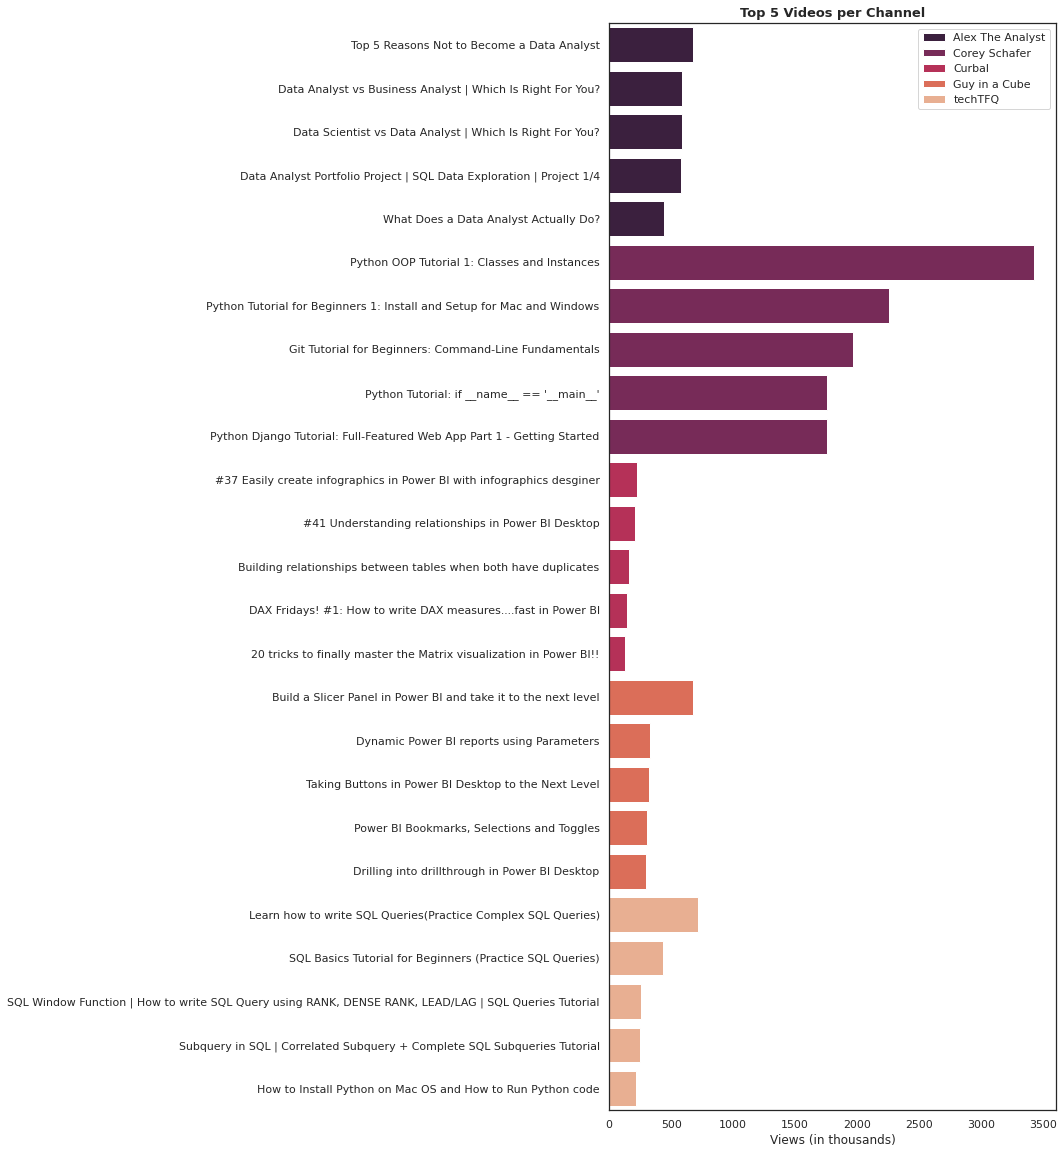

In [40]:


# Plotting the number of Views for the top 5 videos
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_views', y = 'Video_title', hue = 'Channel_name', data = top5_videos, palette = 'rocket', dodge = False)
ax.set_title('Top 5 Videos per Channel', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Views (in thousands)')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()

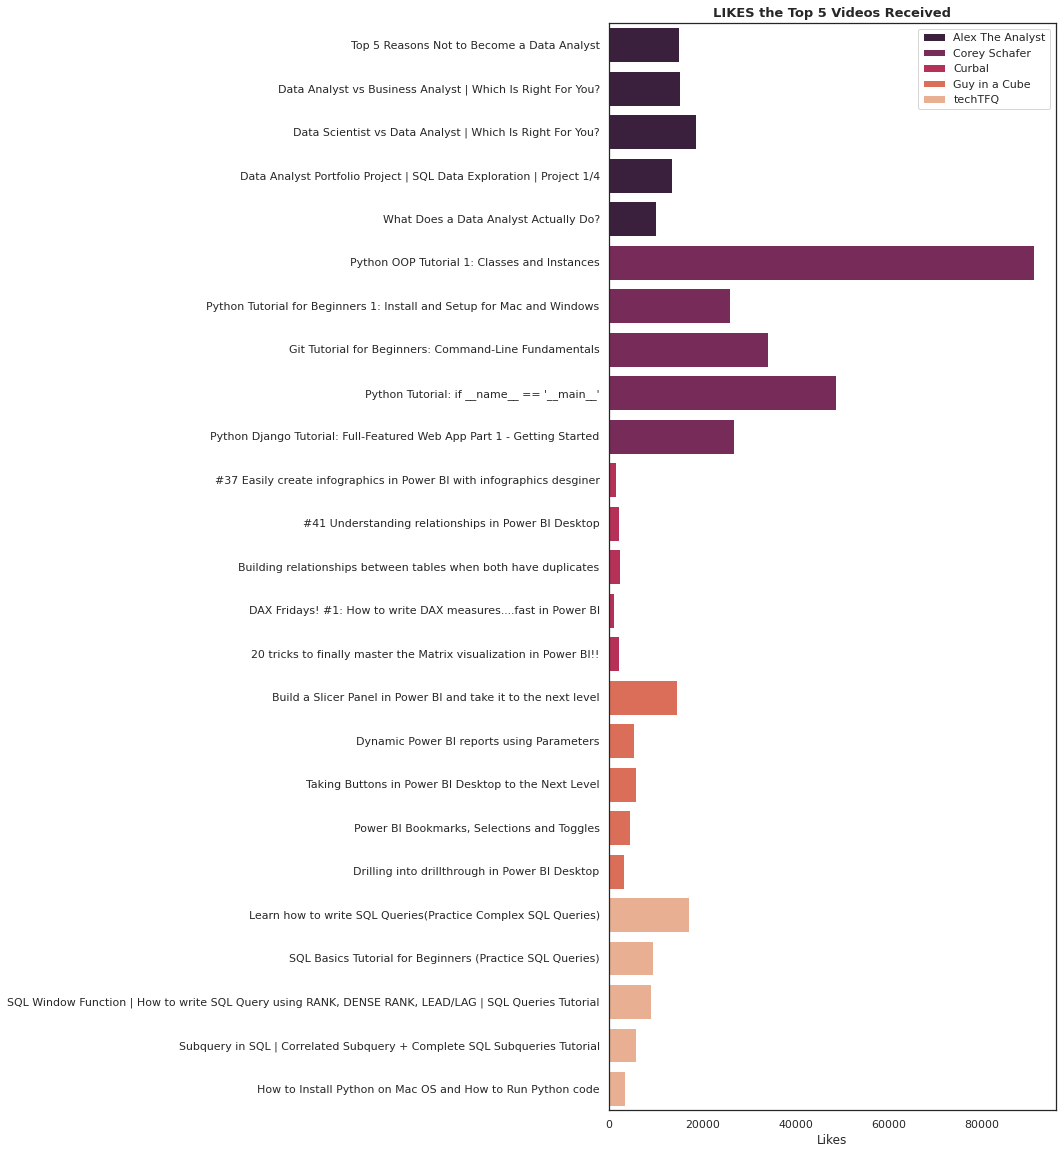

In [42]:
# Plotting the number of Likes
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_likes', y = 'Video_title', hue = 'Channel_name', data = top5_videos, palette = 'rocket', dodge = False)
ax.set_title('LIKES the Top 5 Videos Received', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Likes')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()

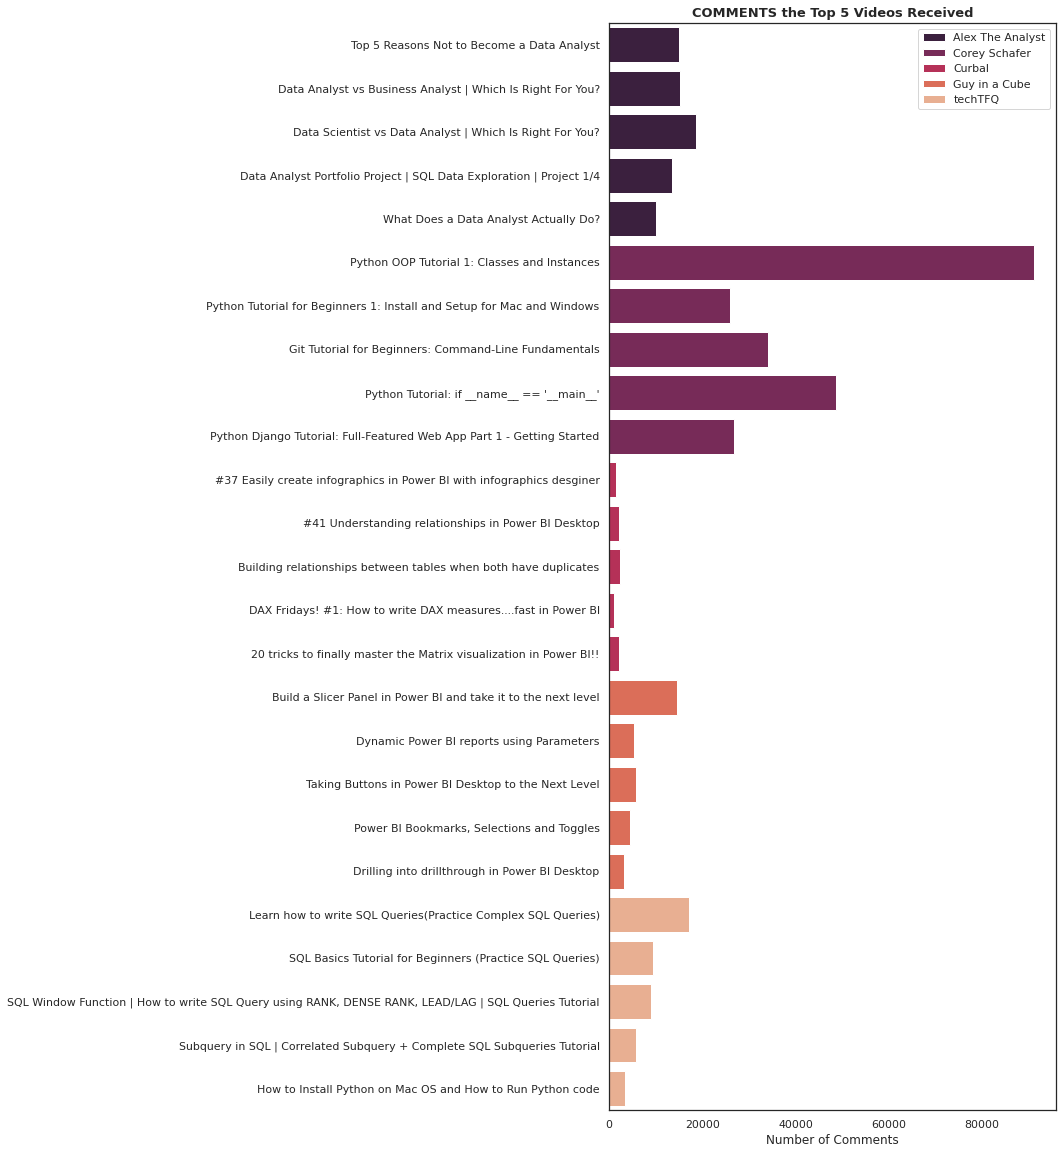

In [43]:
# Plotting the number of Comments
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_likes', y = 'Video_title', hue = 'Channel_name', data = top5_videos, palette = 'rocket', dodge = False)
ax.set_title('COMMENTS the Top 5 Videos Received', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Number of Comments')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()

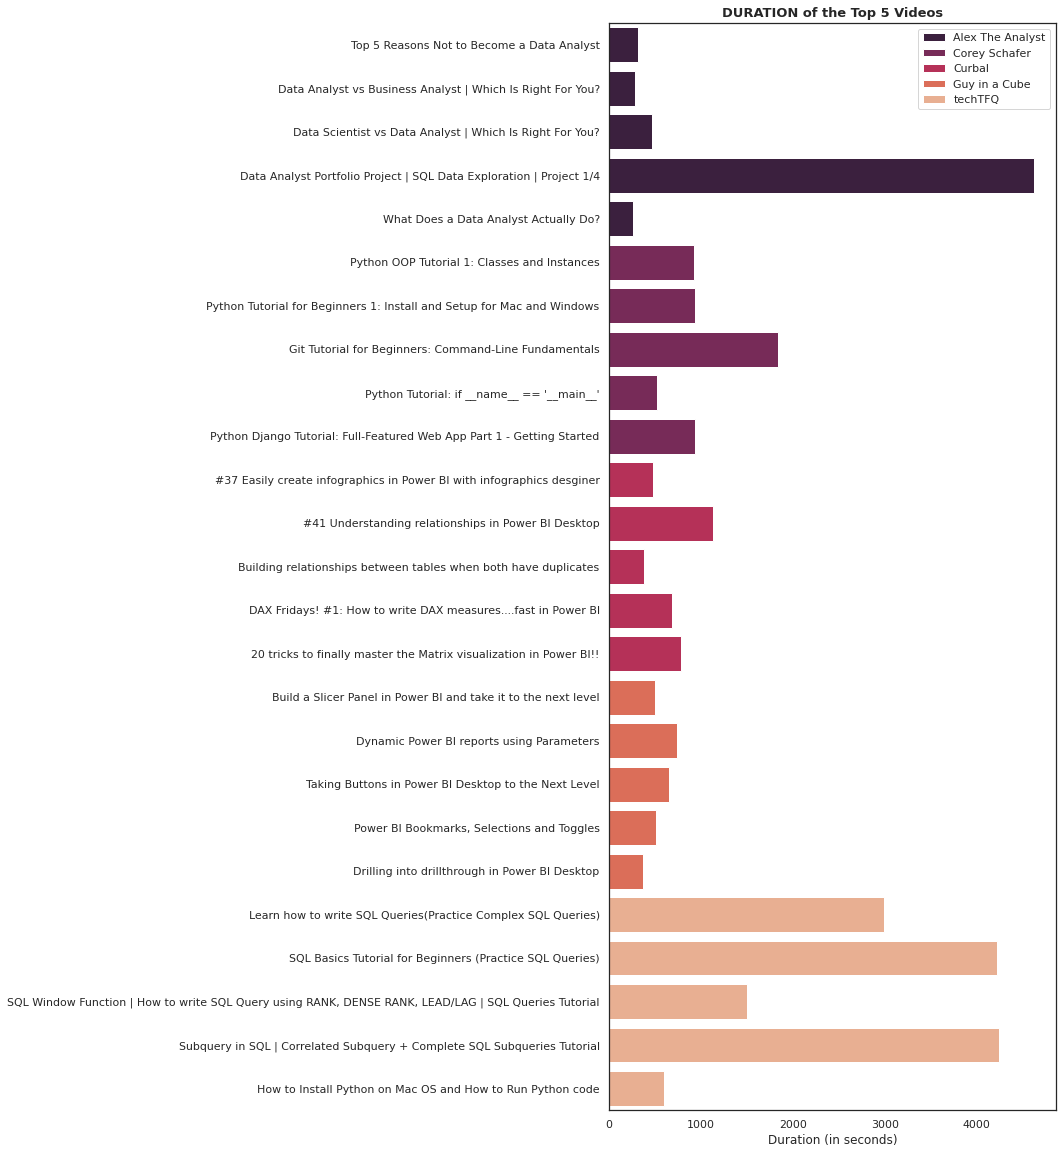

In [44]:
# Plotting the videos duration
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_duration', y = 'Video_title', hue = 'Channel_name', data = top5_videos, palette = 'rocket', dodge = False)
ax.set_title('DURATION of the Top 5 Videos', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Duration (in seconds)')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()

In [45]:


# Calculating averages at the channels level
df_videos_avg = df_videos_stats.groupby('Channel_name', as_index = False).mean()
df_videos_avg



,Channel_name,Video_duration,Video_views,Video_likes,Video_comments
0,Alex The Analyst,1156.019868,64.090298,2004.278146,184.847682
1,Corey Schafer,1226.704348,325.277096,7169.356522,339.639130
2,Curbal,562.079734,14.401089,229.272727,49.598007
3,Guy in a Cube,492.162612,26.675056,505.6863,42.505762
4,techTFQ,1580.984375,63.437797,1702.390625,152.812500


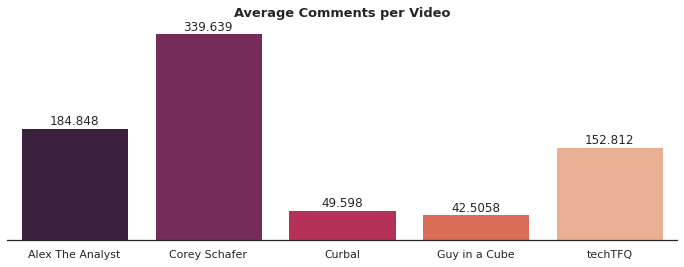

In [46]:
# Visualising the average comments per video and channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', y = 'Video_comments', data = df_videos_avg, palette = 'rocket')
ax.set_title('Average Comments per Video', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)

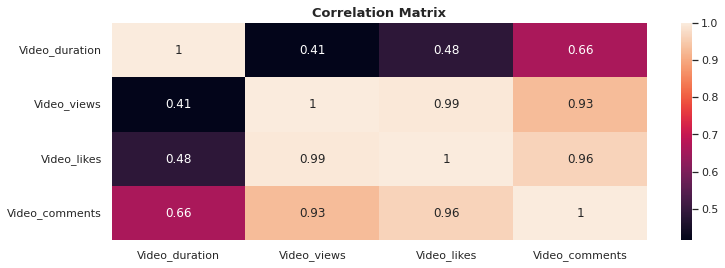

In [47]:


# Generating a correlation matrix
ax = sns.heatmap(df_videos_avg.corr(), annot= True)
ax.set_title('Correlation Matrix', weight = 'semibold').set_fontsize('13')



In [48]:


# Calculating the Likes to Views ratio
df_videos_stats['Likes_to_views'] = round((df_videos_stats['Video_likes'] / (df_videos_stats['Video_views'] * 1000)) * 100, 2) # Views are multiplied by 1000 here because it had been divided by this same number in the beginning of the analysis (for simplicity) 
df_videos_stats.head()



,Channel_name,Channel_id,Video_title,Video_id,Video_duration,Video_publication,Video_views,Video_likes,Video_comments,Video_tags,Likes_to_views
0,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Track all your social media channels EASILY in...,RepXKIEXSY4,463.0,2022-07-07,1.132,76,8,"[Power bi, powerbi, Curbal, power bi desktop, ...",6.71
1,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Conditional format the Power BI line chart wit...,RepXKIEXSY4,272.0,2022-07-05,2.313,113,8,"[Power bi, powerbi, Curbal, power bi desktop, ...",4.89
2,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,DAX Fridays #216: NETWORKDAYS function is fina...,RepXKIEXSY4,241.0,2022-06-30,2.994,177,35,"[Power bi, powerbi, Curbal, power bi desktop, ...",5.91
3,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,"Append exported Power BI data to Excel, AUTOMA...",RepXKIEXSY4,305.0,2022-06-26,2.848,119,23,"[Power bi, powerbi, Curbal, power bi desktop, ...",4.18
4,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Filter the data in Power BI before you export ...,RepXKIEXSY4,637.0,2022-06-25,1.344,59,6,"[Power bi, powerbi, Curbal, power bi desktop, ...",4.39
